In [1]:
import numpy
import urllib
import scipy.optimize
import random
from sklearn import svm
from sklearn import linear_model
from sklearn.decomposition import PCA
from collections import defaultdict
import pandas as pd
import math


In [2]:
f = open("5year.arff", 'r')

In [3]:
while not '@data' in f.readline():
    pass

In [4]:
dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)

In [5]:
len(dataset)

3031

## Modelling

In [6]:
X = [values[:-1] for values in dataset]

In [7]:
y = [values[-1] for values in dataset]

In [8]:
model = linear_model.LogisticRegression(C=1)

In [9]:
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
predictions = model.predict(X)

In [11]:
predictions

array([False, False, False, ..., False, False, False])

In [12]:
correctPredictions = predictions == y

In [13]:
correctPredictions

array([ True,  True,  True, ..., False, False, False])

In [14]:
a = sum(correctPredictions) / len(correctPredictions)
print('accuracy is '+str(a))

accuracy is 0.9666776641372484


In [15]:
TP_ = numpy.logical_and(predictions, y)
FP_ = numpy.logical_and(predictions, numpy.logical_not(y))
TN_ = numpy.logical_and(numpy.logical_not(predictions), numpy.logical_not(y))
FN_ = numpy.logical_and(numpy.logical_not(predictions), y)

In [16]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [17]:
# BER
b = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
print('BER is '+str(b))

BER is 0.48090427704028005



Accuracy is 0.9666
BER is 0.48

## Using balance weight classifer

In [18]:
Xy = list(zip(X,y))
random.shuffle(Xy)

In [19]:
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]

In [20]:
N = len(y)
N

3031

In [21]:
Ntrain = 1515
Nvalid = 758
Ntest = 758

Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain+Nvalid]
Xtest = X[Nvalid+Ntrain:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain+ Nvalid]
ytest = y[Nvalid+Ntrain:]


In [22]:
mod = linear_model.LogisticRegression(C=1,class_weight='balanced')

In [23]:
mod.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
pred = mod.predict(Xtrain)

In [25]:
correct = pred == ytrain

In [26]:
# accuracy
tra = sum(correct) / len(correct)

In [27]:
TP_ = numpy.logical_and(pred, ytrain)
FP_ = numpy.logical_and(pred, numpy.logical_not(ytrain))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytrain))
FN_ = numpy.logical_and(numpy.logical_not(pred), ytrain)

In [28]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [29]:
# BER
trb = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [30]:
pred = mod.predict(Xtest)

In [31]:
correct = pred == ytest

In [32]:
# accuracy
tea = sum(correct) / len(correct)


In [33]:
TP_ = numpy.logical_and(pred, ytest)
FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)


In [34]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [35]:
# BER
teb = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [36]:
pred = mod.predict(Xvalid)

In [37]:
correct = pred == yvalid

In [38]:
# accuracy
vaa = sum(correct) / len(correct)

In [39]:
TP_ = numpy.logical_and(pred, yvalid)
FP_ = numpy.logical_and(pred, numpy.logical_not(yvalid))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(yvalid))
FN_ = numpy.logical_and(numpy.logical_not(pred), yvalid)

In [40]:
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)

In [41]:
# BER
vab = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [42]:
print('training test accuracy is '+ str(tra)+ ' training set ber is '+ str(trb))
print('testing test accuracy is '+ str(tea)+ ' testing set ber is '+ str(teb))
print('validation set accuracy is '+ str(vaa)+ ' validation set ber is '+ str(vab))




training test accuracy is 0.803960396039604 training set ber is 0.24104308390022666
testing test accuracy is 0.8007915567282322 testing set ber is 0.2682937327823691
validation set accuracy is 0.7823218997361477 validation set ber is 0.32504774897680755


## Implementing complete regularization pipeline

In [69]:
Xy = list(zip(X,y))
random.shuffle(Xy)

In [70]:
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]

In [71]:
Ntrain = 1515
Nvalid = 758
Ntest = 758

Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain + Nvalid]
Xtest = X[Nvalid+Ntrain:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain + Nvalid]
ytest = y[Nvalid + Ntrain:]

In [72]:
BER_test=[]
BER_valid=[]
BER_train=[]
R=[]

import math

for i in  range(-4,7) : 
    
    c = math.pow(10,i)
    mod = linear_model.LogisticRegression(C=c,class_weight='balanced')
    mod.fit(Xtrain, ytrain)
    
    pred = mod.predict(Xtest)
    TP_ = numpy.logical_and(pred, ytest)
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    ber_test = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
    BER_test.append(ber_test)
    
    pred = mod.predict(Xvalid)
    TP_ = numpy.logical_and(pred, yvalid)
    FP_ = numpy.logical_and(pred, numpy.logical_not(yvalid))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(yvalid))
    FN_ = numpy.logical_and(numpy.logical_not(pred), yvalid)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    ber_valid = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
    BER_valid.append(ber_valid)
    
    pred = mod.predict(Xtrain)
    TP_ = numpy.logical_and(pred, ytrain)
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytrain))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytrain))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytrain)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)
    ber_train = 1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
    BER_train.append(ber_train)
    
    R.append(i)
    
df = pd.DataFrame(zip(R,BER_test,BER_valid,BER_train), columns = ['C VALUE', 'BER_test','BER_valid','BER_train' ])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWar

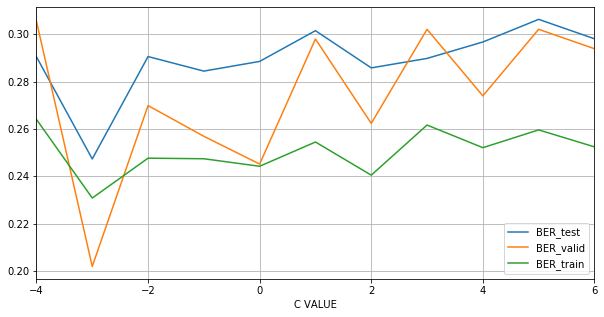

In [73]:
from matplotlib import pyplot as plt
df.plot(x='C VALUE', y=['BER_test', 'BER_valid','BER_train'], figsize=(10,5), grid=True)
plt.show()

Based on the observed graph at around c = 0.001 gives the lowest BER for training and validation and test dat set. Hence i would choose the c =0.001 classifier as it gives the best results in terms of both training data set and validation data set.

## Fscores

In [48]:

weights = [1] * len(ytrain)
mod = linear_model.LogisticRegression(C=1, solver= 'lbfgs')
mod.fit(Xtrain, ytrain, sample_weight=weights)
pred = mod.predict(Xtest)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [49]:
weights=[]
w = 1
for m in range(len(ytrain)):
        if ytrain[m] == True:
            temp= w
            weights.append(temp)
        else:
            temp=1
            weights.append(temp)
mod.fit(Xtrain, ytrain, sample_weight=weights)
pred = mod.predict(Xtest)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [50]:
# precision / recall
retrieved = sum(pred)
relevant = sum(ytest)
intersection = sum([y and p for y,p in zip(ytest,pred)])

precision = intersection / retrieved


precision


0.5

In [51]:
recall = intersection / relevant
recall

0.19047619047619047

In [52]:
(1+1)*(precision*recall/((1)*precision + recall))

0.27586206896551724

In [53]:
(1+100)*(precision*recall/((100)*precision + recall))

0.19165085388994305

In [54]:
len(Xtrain)

1515

In [55]:
len(ytrain)

1515

ytrain[1514]

In [56]:
f1score=[]
f10score =[]

I=[]
mod = linear_model.LogisticRegression(C=1, solver= 'lbfgs')

for i in range(1,20) :
    print(i)
    weights=[]
    for m in range(len(ytrain)):
        if ytrain[m] == True:
            temp= i
            weights.append(temp)
        else:
            temp= 1
            weights.append(temp)

    mod.fit(Xtrain, ytrain, sample_weight= weights)
    pred = mod.predict(Xtest)

    # precision / recall
    retrieved = sum(pred)
    relevant = sum(ytest)
    intersection = sum([y and p for y,p in zip(ytest,pred)])
    precision = intersection / retrieved
    recall = intersection / relevant
    f1 = (1+1)*(precision*recall/((1)*precision + recall))
    f10 = (1+100)*(precision*recall/((100)*precision + recall))
    f1score.append(f1)
    f10score.append(f10)
    I.append(i)
    
fscore = pd.DataFrame(zip(I,f1score,f10score), columns = ['Weights','F1_SCORE', 'F10_SCORE'])   

1
2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


4


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


5
6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


7


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


8


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


9
10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


11
12


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


13


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


14
15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


16
17


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


18
19


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [57]:
fscore

,Weights,F1_SCORE,F10_SCORE
0,1,0.275862,0.191651
1,2,0.266667,0.191560
2,3,0.312500,0.239223
3,4,0.294118,0.238997
4,5,0.263158,0.238545
5,6,0.292683,0.285849
6,7,0.363636,0.380593
7,8,0.333333,0.379878
8,9,0.280702,0.378277
9,10,0.271186,0.377923


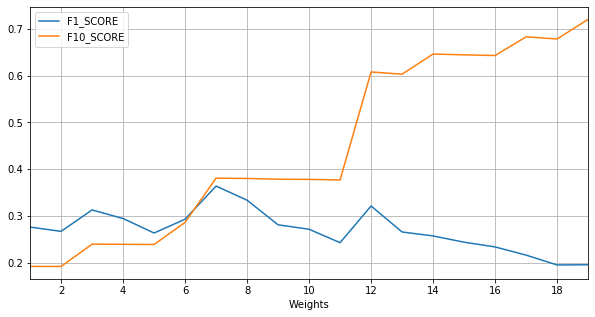

In [58]:
from matplotlib import pyplot as plt
fscore.plot(x='Weights', y=['F1_SCORE', 'F10_SCORE'], figsize=(10,5), grid=True)
plt.show()

From the above graph, at weight =7 for positive samples  f1 and f10 scores of the test set is higher than all other weights. Therefore if the positive samples are weighed by 7,model yields better results

## Implementing Principal Component Analysis

In [59]:
X = [values[1:-1] for values in dataset]
y = [values[-1] for values in dataset]

Xy = list(zip(X,y))
random.shuffle(Xy)
X = [d[0] for d in Xy]
y = [d[1] for d in Xy]
Ntrain = 1515
Nvalid = 758
Ntest = 758

Xtrain = X[:Ntrain]
Xvalid = X[Ntrain:Ntrain+Nvalid]
Xtest = X[Nvalid+Ntrain:]

ytrain = y[:Ntrain]
yvalid = y[Ntrain:Ntrain+ Nvalid]
ytest = y[Nvalid+Ntrain:]

In [60]:
mod = linear_model.LogisticRegression(C=1.0,class_weight='balanced')
mod.fit(Xtrain, ytrain)
pred = mod.predict(Xtest)
correct = pred == ytest
sum(correct) / len(correct)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7770448548812665

In [61]:
TP_ = numpy.logical_and(pred, ytest)
FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
TP = sum(TP_)
FP = sum(FP_)
TN = sum(TN_)
FN = sum(FN_)
    
1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

0.20817570407734343

In [62]:
pca = PCA(n_components= 64)
pca.fit(Xtrain)
pca.components_[0]


array([-9.76824280e-09, -1.66847214e-07, -1.02793028e-06, -5.17404689e-06,
       -1.97273018e-03,  3.98124579e-07, -1.37608568e-06, -5.26199707e-06,
        7.73775421e-07,  4.87195435e-09, -2.36046685e-07, -1.29394176e-06,
       -4.20856627e-07, -1.37608568e-06,  3.20762863e-04, -9.93467540e-07,
       -5.74897397e-06, -1.37608568e-06, -4.77943753e-07, -5.92225599e-05,
       -1.33524376e-07, -2.01918605e-07, -4.34523963e-07, -7.19498351e-07,
       -6.46857666e-07, -8.87045351e-07,  4.90189076e-05, -2.57133709e-05,
       -2.88344330e-06,  1.41224626e-06, -4.74323906e-07,  2.13213061e-04,
       -3.88295881e-06,  1.58256799e-06, -1.67674795e-07,  1.08036707e-06,
        3.09300581e-03,  3.02571968e-07, -1.85320085e-07, -2.34256174e-06,
        3.02620826e-06, -3.96844136e-07, -7.95426329e-05, -2.03185912e-05,
        1.20785304e-06, -3.76491143e-06, -8.97725548e-05, -2.60493387e-07,
       -4.52023653e-07, -4.30908226e-06,  7.62252432e-07,  5.53787767e-07,
       -2.29622697e-06, -

In [63]:
pca = PCA(n_components= 64)
pca.fit(Xtrain)

Xpca_train = numpy.matmul(Xtrain, pca.components_.T)
Xpca_valid = numpy.matmul(Xvalid, pca.components_.T)
Xpca_test = numpy.matmul(Xtest, pca.components_.T)

BER_test =[]
BER_valid =[]
Acc=[]

for n in range(5,31,5):
   
    reduced_train = [x[:n] for x in Xpca_train]
    reduced_valid = [a[:n] for a in Xpca_valid]
    reduced_test = [b[:n] for b in Xpca_test]
    
    mod = linear_model.LogisticRegression(C=1.0,class_weight='balanced')
    mod.fit(reduced_train, ytrain)
    
    pred = mod.predict(reduced_test)
    correct = pred == ytest
    p=sum(correct) / len(correct)
    Acc.append(p)
    
    TP_ = numpy.logical_and(pred, ytest)
    FP_ = numpy.logical_and(pred, numpy.logical_not(ytest))
    TN_ = numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(ytest))
    FN_ = numpy.logical_and(numpy.logical_not(pred), ytest)
    TP = sum(TP_)
    FP = sum(FP_)
    TN = sum(TN_)
    FN = sum(FN_)

    ber=1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))
    BER_test.append(ber)
    
    pred1 = mod.predict(reduced_valid)
    TP_1 = numpy.logical_and(pred1, yvalid)
    FP_1 = numpy.logical_and(pred1, numpy.logical_not(yvalid))
    TN_1 = numpy.logical_and(numpy.logical_not(pred1), numpy.logical_not(yvalid))
    FN_1 = numpy.logical_and(numpy.logical_not(pred1), yvalid)
    TP1 = sum(TP_1)
    FP1 = sum(FP_)
    TN1 = sum(TN_1)
    FN1 = sum(FN_1)
    ber1= 1 - 0.5 * (TP1 / (TP1 + FN1) + TN1 / (TN1 + FP1))
    BER_valid.append(ber1)
    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceW

In [67]:
print(" testing data set BER values for first n dimensions is " + str(BER_test))

 testing data set BER values for first n dimensions is [0.365962589323245, 0.3137873055905842, 0.265973097940311, 0.2560949978982765, 0.24926439680538037, 0.24994745691467002]


In [65]:
Acc

[0.47229551451187335,
 0.716358839050132,
 0.8087071240105541,
 0.7203166226912929,
 0.7335092348284961,
 0.7321899736147758]

In [68]:
print(" Validation data set BER values for first n dimensions is " + str(BER_valid))

 Validation data set BER values for first n dimensions is [0.36193633952254634, 0.25937753721244927, 0.27631728045325776, 0.3012894375857338, 0.27406292749658, 0.2568055555555555]
